In [1]:
from google.colab import files
uploaded = files.upload()


Saving sales_data_sample.csv to sales_data_sample.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Downloaded and used-Sample Sales Data Denormalize Sales Data : Segmentation, Clustering, Shipping, etc. by Gus Segura from kaggle
df = pd.read_csv("sales_data_sample.csv", encoding="ISO-8859-1")


In [4]:
#Inspecting dataset
print(df.shape) # Should output (2823, 25) according to datacard on kaggle
print(df.columns)

(2823, 25)
Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [5]:
# 2. Cleaning Data
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df.dropna(subset=['ORDERDATE'], inplace=True)
df['year'] = df['ORDERDATE'].dt.year
df['month'] = df['ORDERDATE'].dt.month

In [6]:
#Checking cleaned data
print(df.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'year', 'month'],
      dtype='object')


In [8]:
# Impute or drop missing: example for STATE and POSTALCODE

df['STATE'] = df['STATE'].fillna('Unknown')

df.dropna(subset=['POSTALCODE'], inplace=True)

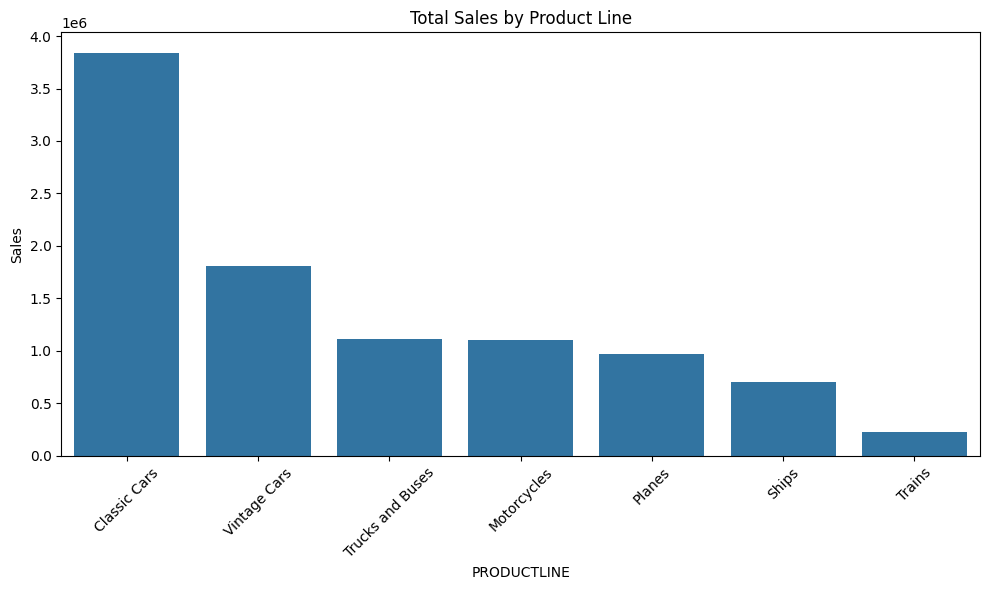

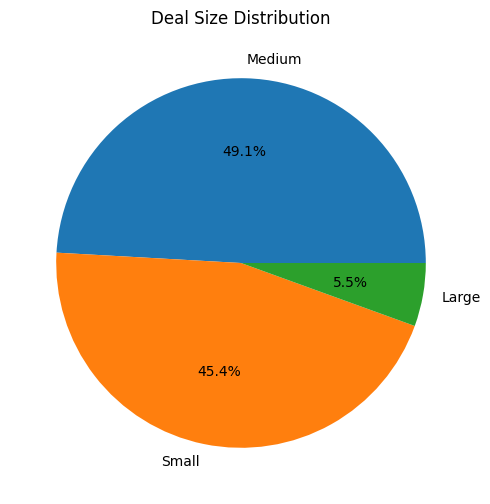

In [9]:
# 3. Visualizations Using Matplotlib and Seaborn
plt.figure(figsize=(10,6))
sales_by_product = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_product.index, y=sales_by_product.values)
plt.xticks(rotation=45)
plt.title('Total Sales by Product Line')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

df['DEALSIZE'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), title='Deal Size Distribution')
plt.ylabel('')
plt.show()

In [10]:
# 4. Pivot Table Example
pivot = pd.pivot_table(df, values='SALES', index='COUNTRY', columns='PRODUCTLINE', aggfunc='sum', fill_value=0)
print(pivot.head())

PRODUCTLINE  Classic Cars  Motorcycles    Planes     Ships    Trains  \
COUNTRY                                                                
Australia       193085.54     89968.76  74853.87   4159.76   1681.35   
Austria         101459.47     26047.66  17860.44   9024.73      0.00   
Belgium          20136.96         0.00   5624.79  31708.01   9017.26   
Canada           61623.22      4177.49  25510.07  40309.01      0.00   
Denmark         157182.48         0.00   7586.45  38697.26  11476.33   

PRODUCTLINE  Trucks and Buses  Vintage Cars  
COUNTRY                                      
Australia            77318.50     189555.32  
Austria              20472.75      27197.48  
Belgium                  0.00      41925.60  
Canada               51945.98      40512.79  
Denmark               9588.82      21105.81  
